# Load Data

In [ ]:
!cp /content/drive/MyDrive/KPMG_VI_New_raw_data_update_final.xlsx /content/

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Read Demograph and Transaction Data for Old customers

In [ ]:
demograph_raw = pd.read_excel('/content/KPMG_VI_New_raw_data_update_final.xlsx', sheet_name = "CustomerDemographic", skiprows = [0],parse_dates= ["DOB"])

In [ ]:
transact_raw = pd.read_excel("/content/KPMG_VI_New_raw_data_update_final.xlsx", sheet_name= "Transactions", skiprows= [0], parse_dates= ["transaction_date"])

In [ ]:
address_raw = pd.read_excel("/content/KPMG_VI_New_raw_data_update_final.xlsx", sheet_name= "CustomerAddress", skiprows= [0])

In [ ]:
demograph_raw.drop(["first_name","last_name", "default", "job_title"], axis = 1, inplace = True)

In [ ]:
demograph_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 9 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   customer_id                          4000 non-null   int64         
 1   gender                               4000 non-null   object        
 2   past_3_years_bike_related_purchases  4000 non-null   int64         
 3   DOB                                  3913 non-null   datetime64[ns]
 4   job_industry_category                3344 non-null   object        
 5   wealth_segment                       4000 non-null   object        
 6   deceased_indicator                   4000 non-null   object        
 7   owns_car                             4000 non-null   object        
 8   tenure                               3913 non-null   float64       
dtypes: datetime64[ns](1), float64(1), int64(2), object(5)
memory usage: 281.4+ KB


# See Uniques + Outliers and Clean Data

> create age column in demograph

In [ ]:
import datetime

demograph_raw["customer_age"] = (datetime.datetime.now().year - demograph_raw.DOB.dt.year)
demograph_raw.drop("DOB", axis = 1, inplace = True)

> See uniques and outliers in demograph

Uniques in 'gender' column            :             ['Male' 'Female' 'F' 'Femal' 'M' 'U']
Uniques in 'job_industry_category' column            :             ['Retail' 'Property' 'Manufacturing' 'Health' 'IT' 'Entertainment'
 'Financial Services' nan 'Argiculture' 'Telecommunications']
Uniques in 'wealth_segment' column            :             ['Affluent Customer' 'Mass Customer' 'High Net Worth']
Uniques in 'deceased_indicator' column            :             ['N' 'Y']
Uniques in 'owns_car' column            :             ['No' 'Yes']


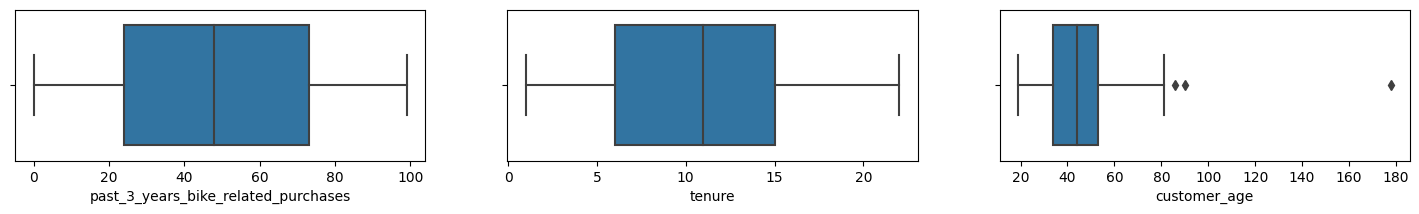

In [ ]:
import seaborn as sns

numerical_columns = demograph_raw.iloc[:, 1:].select_dtypes(exclude = object).columns
categorical_columns = demograph_raw.iloc[:, 1:].select_dtypes(include = object).columns

#check categoriacl columns 
for col in categorical_columns:
    print(f"Uniques in '{col}' column            :             {demograph_raw[col].unique()}")

#check numerical columns
fig, axe = plt.subplots(1, 3, figsize = (18, 2), dpi = 100)
for i, col in enumerate(numerical_columns):
    sns.boxplot(x = col, data = demograph_raw, ax = axe[i])

In [ ]:
# clean gender
gender_list = []

for gender in demograph_raw.gender:
    if gender == "F" or gender == "Femal":
        gender = "Female"
    elif gender == "M":
        gender = "Male"
    gender_list.append(gender)

demograph_raw["gender"] = gender_list

In [ ]:
demograph_raw.gender.unique()

array(['Male', 'Female', 'U'], dtype=object)

In [ ]:
#dropna and clean outliers in age
demograph_raw.dropna(inplace = True)
demograph_raw = demograph_raw[demograph_raw.customer_age < 160]

In [ ]:
demograph_raw.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3256 entries, 0 to 3911
Data columns (total 9 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   customer_id                          3256 non-null   int64  
 1   gender                               3256 non-null   object 
 2   past_3_years_bike_related_purchases  3256 non-null   int64  
 3   job_industry_category                3256 non-null   object 
 4   wealth_segment                       3256 non-null   object 
 5   deceased_indicator                   3256 non-null   object 
 6   owns_car                             3256 non-null   object 
 7   tenure                               3256 non-null   float64
 8   customer_age                         3256 non-null   float64
dtypes: float64(2), int64(2), object(5)
memory usage: 254.4+ KB


> Recheck uniques and outliers in cleaned demograph

Uniques in 'gender' column            :             ['Male' 'Female']
Uniques in 'job_industry_category' column            :             ['Retail' 'Property' 'Manufacturing' 'Health' 'IT' 'Entertainment'
 'Financial Services' 'Argiculture' 'Telecommunications']
Uniques in 'wealth_segment' column            :             ['Affluent Customer' 'Mass Customer' 'High Net Worth']
Uniques in 'deceased_indicator' column            :             ['N' 'Y']
Uniques in 'owns_car' column            :             ['No' 'Yes']


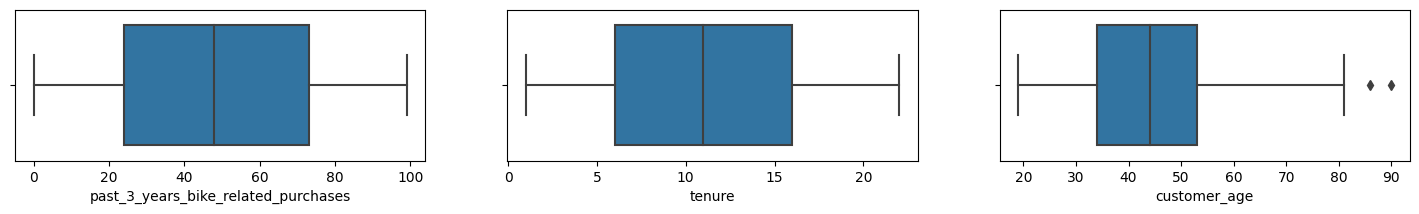

In [ ]:
demograph_raw.reset_index(drop = True)

#check categoriacl columns 
for col in categorical_columns:
    print(f"Uniques in '{col}' column            :             {demograph_raw[col].unique()}")

#check numerical columns
fig, axe = plt.subplots(1, 3, figsize = (18, 2), dpi = 100)
for i, col in enumerate(numerical_columns):
    sns.boxplot(x = col, data = demograph_raw, ax = axe[i])

In [ ]:
#clean out deceased customers
demograph_raw = demograph_raw[demograph_raw.deceased_indicator == "N"]

> Clean transact dataframe

In [ ]:
transact_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   transaction_id           20000 non-null  int64         
 1   product_id               20000 non-null  int64         
 2   customer_id              20000 non-null  int64         
 3   transaction_date         20000 non-null  datetime64[ns]
 4   online_order             19640 non-null  float64       
 5   order_status             20000 non-null  object        
 6   brand                    19803 non-null  object        
 7   product_line             19803 non-null  object        
 8   product_class            19803 non-null  object        
 9   product_size             19803 non-null  object        
 10  list_price               20000 non-null  float64       
 11  standard_cost            19803 non-null  float64       
 12  product_first_sold_date  19803 n

In [ ]:
transact_raw.head()

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date
0,1,2,2950,2017-02-25,0.0,Approved,Solex,Standard,medium,medium,71.49,53.62,41245.0
1,2,3,3120,2017-05-21,1.0,Approved,Trek Bicycles,Standard,medium,large,2091.47,388.92,41701.0
2,3,37,402,2017-10-16,0.0,Approved,OHM Cycles,Standard,low,medium,1793.43,248.82,36361.0
3,4,88,3135,2017-08-31,0.0,Approved,Norco Bicycles,Standard,medium,medium,1198.46,381.10,36145.0
4,5,78,787,2017-10-01,1.0,Approved,Giant Bicycles,Standard,medium,large,1765.30,709.48,42226.0


In [ ]:
numerical_columns = transact_raw.iloc[:, 4:].select_dtypes(exclude = object).columns
categorical_columns = transact_raw.iloc[:, 4:].select_dtypes(include = object).columns

print(len(numerical_columns))

4


> Check Uniques and Outliers in Transact

Uniques in 'order_status' column            :             ['Approved' 'Cancelled']
Uniques in 'brand' column            :             ['Solex' 'Trek Bicycles' 'OHM Cycles' 'Norco Bicycles' 'Giant Bicycles'
 'WeareA2B' nan]
Uniques in 'product_line' column            :             ['Standard' 'Road' 'Mountain' 'Touring' nan]
Uniques in 'product_class' column            :             ['medium' 'low' 'high' nan]
Uniques in 'product_size' column            :             ['medium' 'large' 'small' nan]


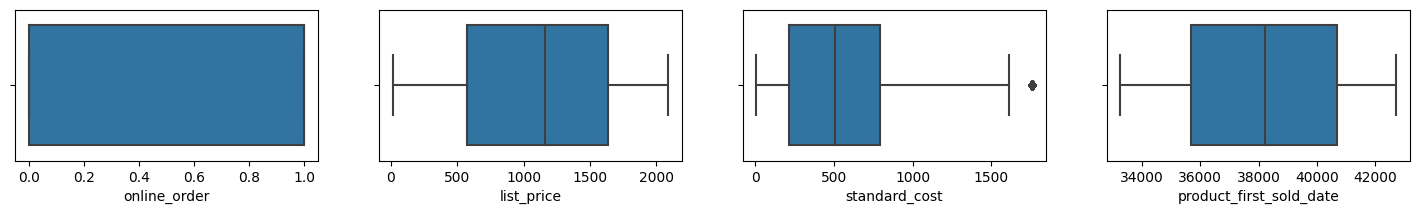

In [ ]:
#check categoriacl columns 
for col in categorical_columns:
    print(f"Uniques in '{col}' column            :             {transact_raw[col].unique()}")

#check numerical columns
fig, axe = plt.subplots(1, 4, figsize = (18, 2), dpi = 100)
for i, col in enumerate(numerical_columns):
    sns.boxplot(x = col, data = transact_raw, ax = axe[i])

In [ ]:
# remove product first sold data (unused) and dropna
transact_raw = transact_raw.iloc[:, :-1]
transact_raw.dropna(inplace = True)

In [ ]:
transact_raw.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19445 entries, 0 to 19999
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   transaction_id    19445 non-null  int64         
 1   product_id        19445 non-null  int64         
 2   customer_id       19445 non-null  int64         
 3   transaction_date  19445 non-null  datetime64[ns]
 4   online_order      19445 non-null  float64       
 5   order_status      19445 non-null  object        
 6   brand             19445 non-null  object        
 7   product_line      19445 non-null  object        
 8   product_class     19445 non-null  object        
 9   product_size      19445 non-null  object        
 10  list_price        19445 non-null  float64       
 11  standard_cost     19445 non-null  float64       
dtypes: datetime64[ns](1), float64(3), int64(3), object(5)
memory usage: 1.9+ MB


Uniques in 'order_status' column            :             ['Approved' 'Cancelled']
Uniques in 'brand' column            :             ['Solex' 'Trek Bicycles' 'OHM Cycles' 'Norco Bicycles' 'Giant Bicycles'
 'WeareA2B']
Uniques in 'product_line' column            :             ['Standard' 'Road' 'Mountain' 'Touring']
Uniques in 'product_class' column            :             ['medium' 'low' 'high']
Uniques in 'product_size' column            :             ['medium' 'large' 'small']


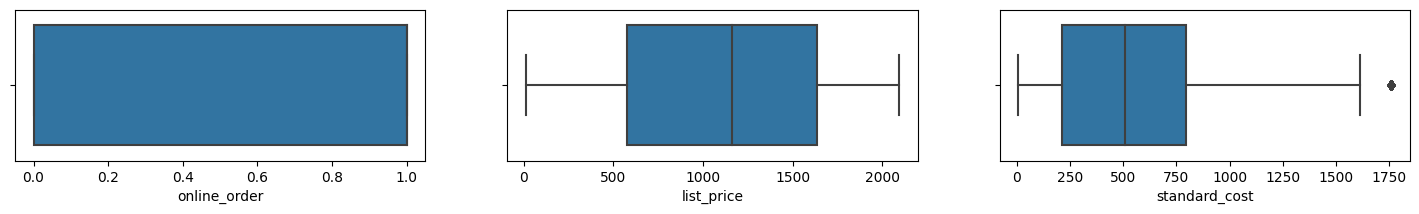

In [ ]:
#Recheck Uniques and Outliers in Transact
numerical_columns = transact_raw.iloc[:, 4:].select_dtypes(exclude = object).columns
categorical_columns = transact_raw.iloc[:, 4:].select_dtypes(include = object).columns

#check categoriacl columns 
for col in categorical_columns:
    print(f"Uniques in '{col}' column            :             {transact_raw[col].unique()}")

#check numerical columns
fig, axe = plt.subplots(1, 3, figsize = (18, 2), dpi = 100)
for i, col in enumerate(numerical_columns):
    sns.boxplot(x = col, data = transact_raw, ax = axe[i])

In [ ]:
#Create Profit column
transact_raw["profit"] = transact_raw.list_price - transact_raw.standard_cost

> Clean Address DataFrame

In [ ]:
address_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 0 to 3998
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   customer_id         3999 non-null   int64 
 1   address             3999 non-null   object
 2   postcode            3999 non-null   int64 
 3   state               3999 non-null   object
 4   country             3999 non-null   object
 5   property_valuation  3999 non-null   int64 
dtypes: int64(3), object(3)
memory usage: 187.6+ KB


In [ ]:
address_raw.head()

,customer_id,address,postcode,state,country,property_valuation
0,1,060 Morning Avenue,2016,New South Wales,Australia,10
1,2,6 Meadow Vale Court,2153,New South Wales,Australia,10
2,4,0 Holy Cross Court,4211,QLD,Australia,9
3,5,17979 Del Mar Point,2448,New South Wales,Australia,4
4,6,9 Oakridge Court,3216,VIC,Australia,9


> Check Uniques and Outliers in Address Df

Uniques in 'address' column            :             ['060 Morning Avenue' '6 Meadow Vale Court' '0 Holy Cross Court' ...
 '87 Crescent Oaks Alley' '8194 Lien Street' '320 Acker Drive']
Uniques in 'state' column            :             ['New South Wales' 'QLD' 'VIC' 'NSW' 'Victoria']
Uniques in 'country' column            :             ['Australia']


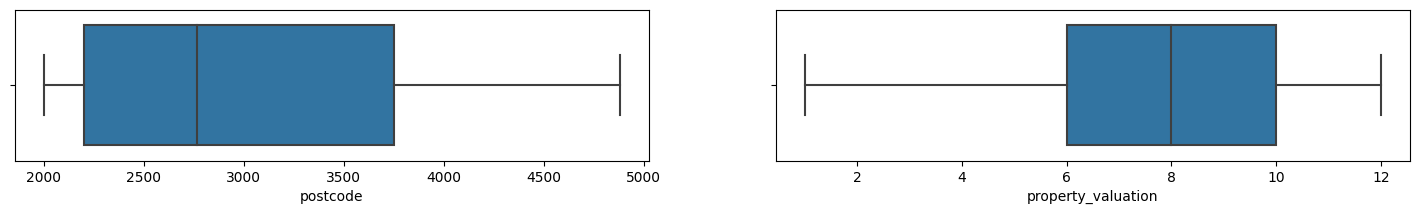

In [ ]:
numerical_columns = address_raw.iloc[:, 1:].select_dtypes(exclude = object).columns
categorical_columns = address_raw.iloc[:, 1:].select_dtypes(include = object).columns

#check categoriacl columns 
for col in categorical_columns:
    print(f"Uniques in '{col}' column            :             {address_raw[col].unique()}")

#check numerical columns
fig, axe = plt.subplots(1, 2, figsize = (18, 2), dpi = 100)
for i, col in enumerate(numerical_columns):
    sns.boxplot(x = col, data = address_raw, ax = axe[i])

In [ ]:
#clean unconsistent input in 'state' column
state_list = []
for state in address_raw.state:
    if state == "New South Wales":
        state = "NSW"
    elif state == "Victoria":
        state = "VIC"
    state_list.append(state)
address_raw["state"] = state_list
address_raw.state.unique()

array(['NSW', 'QLD', 'VIC'], dtype=object)

# Read Data for New (focused) Customers

In [ ]:
new_customer_raw = pd.read_excel("/content/KPMG_VI_New_raw_data_update_final.xlsx", sheet_name= "NewCustomerList", skiprows=[0], parse_dates = ["DOB"])

In [ ]:
new_customer_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 23 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   first_name                           1000 non-null   object        
 1   last_name                            971 non-null    object        
 2   gender                               1000 non-null   object        
 3   past_3_years_bike_related_purchases  1000 non-null   int64         
 4   DOB                                  983 non-null    datetime64[ns]
 5   job_title                            894 non-null    object        
 6   job_industry_category                835 non-null    object        
 7   wealth_segment                       1000 non-null   object        
 8   deceased_indicator                   1000 non-null   object        
 9   owns_car                             1000 non-null   object        
 10  tenure       

In [ ]:
# create age columns
new_customer_raw["customer_age"] = datetime.datetime.now().year - new_customer_raw.DOB.dt.year
new_customer_raw.drop("DOB", axis = 1, inplace = True)

In [ ]:
numerical_columns = new_customer_raw.iloc[:, 3:].select_dtypes(exclude = object).columns
categorical_columns = new_customer_raw.iloc[:, 3:].select_dtypes(include = object).columns

print(len(numerical_columns))

12


>  check uniques and outliers in new customer list dataframe

Uniques in 'job_industry_category' column            :             ['Manufacturing' 'Property' 'Financial Services' 'Entertainment' 'Retail'
 'IT' 'Telecommunications' 'Health' nan 'Argiculture']
Uniques in 'wealth_segment' column            :             ['Mass Customer' 'Affluent Customer' 'High Net Worth']
Uniques in 'deceased_indicator' column            :             ['N']
Uniques in 'owns_car' column            :             ['Yes' 'No']
Uniques in 'state' column            :             ['QLD' 'NSW' 'VIC']
Uniques in 'country' column            :             ['Australia']


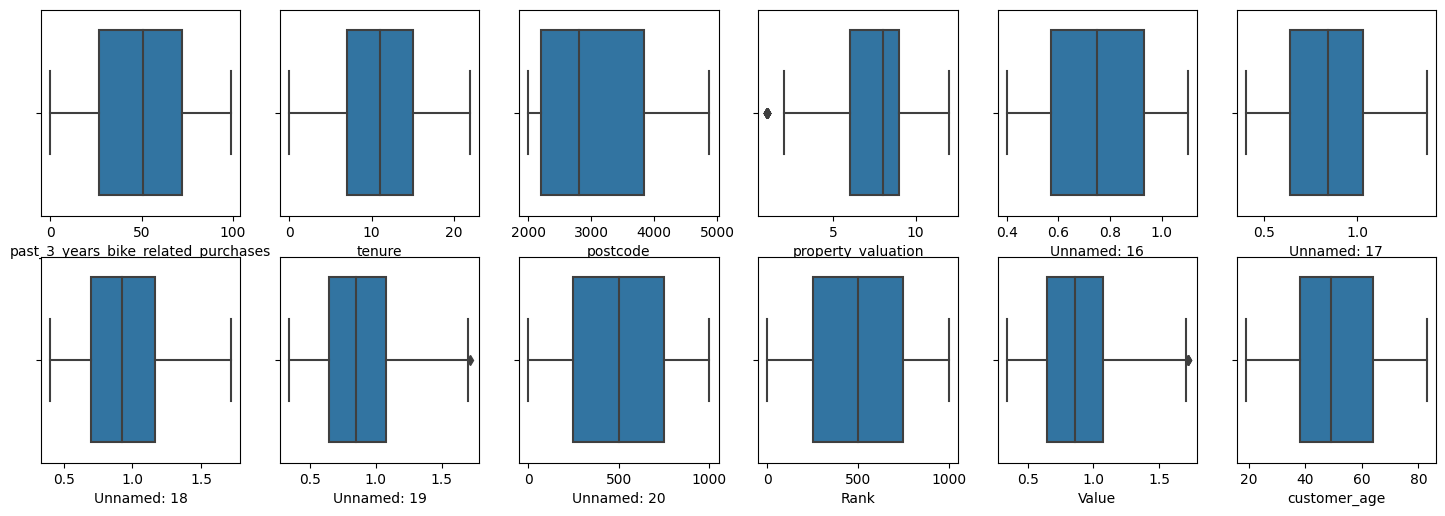

In [ ]:
#check categoriacl columns 
for col in categorical_columns:
    if (col != "job_title") and (col != 'address'):
        print(f"Uniques in '{col}' column            :             {new_customer_raw[col].unique()}")

#check numerical columns
fig, axe = plt.subplots(2, 6, figsize = (18, 6), dpi = 100)
for i, col in enumerate(numerical_columns):
    plot_site = i
    if plot_site < int(len(numerical_columns)/2):
        sns.boxplot(x = col, data = new_customer_raw, ax = axe[0][plot_site])
    else:
        plot_site -=  int(len(numerical_columns)/2)
        sns.boxplot(x = col, data = new_customer_raw, ax = axe[1][plot_site])


# Change cleaned data to new variables for ease of processing

In [ ]:
demograph_df = demograph_raw.reset_index(drop = True)
transact_raw = transact_raw[transact_raw.order_status == 'Approved']
transact_df = transact_raw.reset_index(drop = True)
address_df = address_raw.reset_index(drop = True)
new_customer_raw.dropna(inplace = True)
new_customer_df = new_customer_raw.reset_index(drop = True)

# RFM analysis in transact df

In [ ]:
#RFM values from transact_df
transact_df.head()

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,profit
0,1,2,2950,2017-02-25,0.0,Approved,Solex,Standard,medium,medium,71.49,53.62,17.87
1,2,3,3120,2017-05-21,1.0,Approved,Trek Bicycles,Standard,medium,large,2091.47,388.92,1702.55
2,3,37,402,2017-10-16,0.0,Approved,OHM Cycles,Standard,low,medium,1793.43,248.82,1544.61
3,4,88,3135,2017-08-31,0.0,Approved,Norco Bicycles,Standard,medium,medium,1198.46,381.10,817.36
4,5,78,787,2017-10-01,1.0,Approved,Giant Bicycles,Standard,medium,large,1765.30,709.48,1055.82


In [ ]:
#Create "recency" column from transaction_date

transact_df["recency"] = transact_df.transaction_date.max() - transact_df.transaction_date

In [ ]:
# createa a pivot for recency frequency and monetary

rfm_pivot = pd.pivot_table(transact_df[["customer_id", "recency", "transaction_id",  "profit"]],index = "customer_id", values = ["recency", "transaction_id", "profit"],
                           aggfunc = {
                               'recency': np.min,
                               'transaction_id' : np.count_nonzero,
                               'profit' : np.mean
                           })

In [ ]:
rfm_pivot = rfm_pivot.reset_index()

In [ ]:
#calculate r_score in rfm_pivot
r_score_list = []
r_list = rfm_pivot.recency
q1, q3 = np.percentile(r_list, [25, 75])
med = np.median(r_list)

for r in r_list:
    
    if r > q3:
        r_score_list.append(1)
    elif r > med and r <= q3:
        r_score_list.append(2)
    elif r > q1 and r <= med:
        r_score_list.append(3)
    else:
        r_score_list.append(4)

rfm_pivot["r_score"] = r_score_list
        

In [ ]:
# calculate f_score in rfm_pivot
f_score_list = []
f_list = rfm_pivot.transaction_id
q1, q3 = np.percentile(f_list, [25, 75])
med = np.median(f_list)

for r in f_list:
    
    if r > q3:
        f_score_list.append(4)
    elif r > med and r <= q3:
        f_score_list.append(3)
    elif r > q1 and r <= med:
        f_score_list.append(2)
    else:
        f_score_list.append(1)


rfm_pivot["f_score"] = f_score_list
        

In [ ]:
#calculate m_score in rfm_pivot
m_score_list = []
m_list = rfm_pivot.profit
q1, q3 = np.percentile(m_list, [25, 75])
med = np.median(m_list)

for r in m_list:
    
    if r > q3:
        m_score_list.append(4)
    elif r > med and r <= q3:
        m_score_list.append(3)
    elif r > q1 and r <= med:
        m_score_list.append(2)
    else:
        m_score_list.append(1)

rfm_pivot["m_score"] = m_score_list

In [ ]:
rfm_pivot.head()

,customer_id,profit,recency,transaction_id,r_score,f_score,m_score
0,1,274.371818,7 days,11,4,4,1
1,2,742.086667,128 days,3,1,1,4
2,3,470.030000,102 days,7,1,3,2
3,4,110.285000,195 days,2,1,1,1
4,5,399.156667,16 days,6,4,3,2


In [ ]:
#create a rfm column from from r_score, f_score and m_score

rfm_pivot['rfm'] = rfm_pivot.r_score * 100 + rfm_pivot.f_score * 10 + rfm_pivot.m_score

temp = rfm_pivot.groupby("rfm", as_index = False).count()

In [ ]:
rfm_list = [i for i in rfm_pivot.rfm if (i != 444)]
pecen_10 = np.percentile(rfm_list, 10)
pecen_20 = np.percentile(rfm_list, 20)
pecen_30 = np.percentile(rfm_list, 30)
pecen_40 = np.percentile(rfm_list, 40)
pecen_50 = np.percentile(rfm_list, 50)
pecen_60 = np.percentile(rfm_list, 60)
pecen_70 = np.percentile(rfm_list, 70)
pecen_80 = np.percentile(rfm_list, 80)
pecen_90 = np.percentile(rfm_list, 90)
pecen_100 = np.percentile(rfm_list,100)


In [ ]:
# create customer_title from rfm (rfm) values

rfm_list = []
for rfm in rfm_pivot.rfm:
    if rfm >= pecen_100:
        rfm = "Platinum"
    elif rfm < pecen_100 and rfm >= pecen_90:
        rfm = "Very Loyal"
    elif rfm < pecen_90 and rfm >= pecen_80:
        rfm = 'Becoming Loyal'
    elif rfm  < pecen_80 and rfm >= pecen_70:
        rfm = 'Recent Customer'
    elif rfm < pecen_70 and rfm >= pecen_60:
        rfm = 'Potential Customer'
    elif rfm < pecen_60 and rfm >= pecen_50:
        rfm = 'Late Bloomer'
    elif rfm < pecen_50 and rfm >= pecen_40:
        rfm = 'Losing Customer'
    elif rfm < pecen_40 and rfm >= pecen_30:
        rfm = 'High Risk Customer'
    elif rfm < pecen_30 and rfm >= pecen_20:
        rfm = 'Almost Lost Customer'
    elif rfm < pecen_20 and rfm >= pecen_10:
        rfm = 'Evasive Customer'
    else:
        rfm = "Lost Customer"
    rfm_list.append(rfm)

rfm_pivot['customer_title'] = rfm_list

In [ ]:
rfm_pivot.head()

,customer_id,profit,recency,transaction_id,r_score,f_score,m_score,rfm,customer_title
0,1,274.371818,7 days,11,4,4,1,441,Very Loyal
1,2,742.086667,128 days,3,1,1,4,114,Evasive Customer
2,3,470.030000,102 days,7,1,3,2,132,Almost Lost Customer
3,4,110.285000,195 days,2,1,1,1,111,Lost Customer
4,5,399.156667,16 days,6,4,3,2,432,Very Loyal


> relations of recency vs frequency vs monetary

In [ ]:
#recency vs monetary
recency_monetary = rfm_pivot[["profit", "recency"]]
recency_monetary['recency'] = recency_monetary.recency.dt.total_seconds()/86400

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


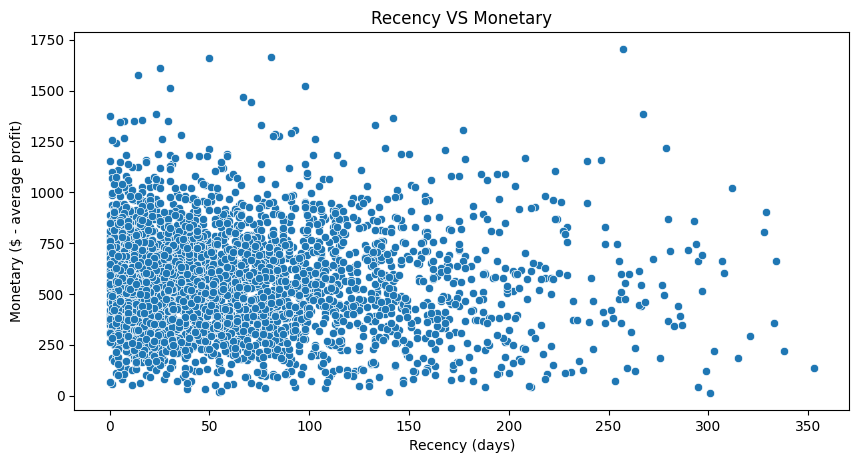

In [ ]:
ax = plt.figure(figsize = (10, 5), dpi = 100)
ax = sns.scatterplot(x = 'recency', y = 'profit', data = recency_monetary)
ax.set_title("Recency VS Monetary")
ax.set_ylabel("Monetary ($ - average profit)")
ax.set_xlabel("Recency (days)")
plt.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


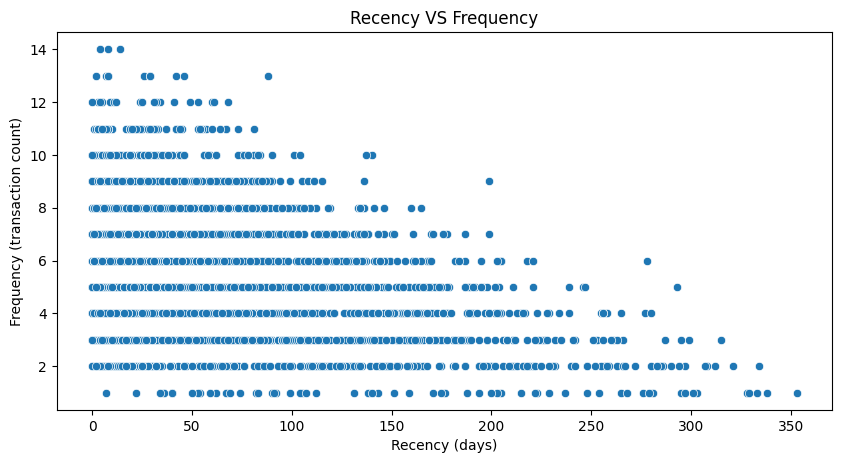

In [ ]:
#recency vs frequency

recency_frequency = rfm_pivot[["transaction_id", "recency"]]
recency_frequency['recency'] = recency_frequency.recency.dt.total_seconds()/86400

ax = plt.figure(figsize = (10, 5), dpi = 100)
ax = sns.scatterplot(x = 'recency', y = 'transaction_id', data = recency_frequency)
ax.set_title("Recency VS Frequency")
ax.set_ylabel("Frequency (transaction count)")
ax.set_xlabel("Recency (days)")
plt.show()

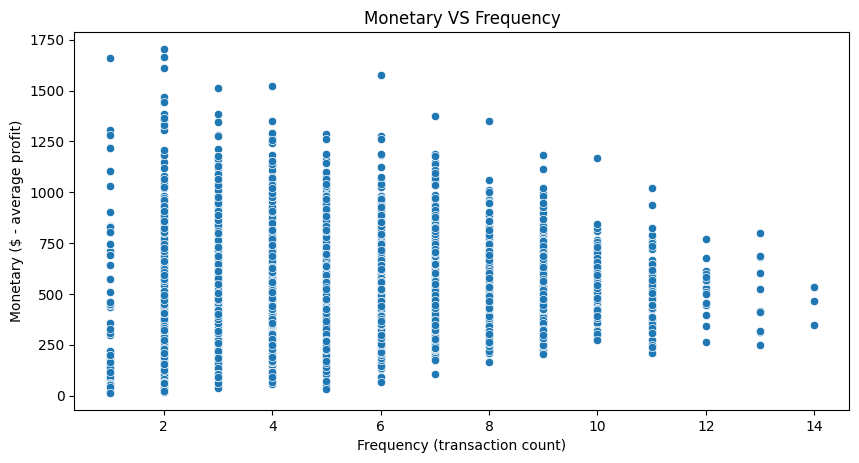

In [ ]:
#frequency vs monetary

frequency_monetary = rfm_pivot[["transaction_id", "profit"]]

ax = plt.figure(figsize = (10, 5), dpi = 100)
ax = sns.scatterplot(y = 'profit', x = 'transaction_id', data = frequency_monetary)
ax.set_title("Monetary VS Frequency")
ax.set_xlabel("Frequency (transaction count)")
ax.set_ylabel("Monetary ($ - average profit)")
plt.show()

# Distributions of Features in Old Customer List and New Customer List

In [ ]:
# merge addresses on old customer demograph
demograph_add = demograph_df.merge(address_df, on = 'customer_id')

> Gender with customer type 

In [ ]:
# add customer title on old customer demograph
segmented_demograph = rfm_pivot[["customer_id", "customer_title"]].merge(demograph_add, on = 'customer_id')

In [ ]:
segmented_demograph.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2847 entries, 0 to 2846
Data columns (total 15 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   customer_id                          2847 non-null   int64  
 1   customer_title                       2847 non-null   object 
 2   gender                               2847 non-null   object 
 3   past_3_years_bike_related_purchases  2847 non-null   int64  
 4   job_industry_category                2847 non-null   object 
 5   wealth_segment                       2847 non-null   object 
 6   deceased_indicator                   2847 non-null   object 
 7   owns_car                             2847 non-null   object 
 8   tenure                               2847 non-null   float64
 9   customer_age                         2847 non-null   float64
 10  address                              2847 non-null   object 
 11  postcode                      

In [ ]:
temp = segmented_demograph[['customer_id', 'customer_title', 'gender']]
gender_customer_type = pd.DataFrame(columns = ["gender", 'customer_title', 'count'])
for gen in temp.gender.unique():
    temp_df1 = pd.DataFrame()
    temp_df1['gender'] = [gen for i in range(len(temp.customer_title.unique()))]
    temp_df1['customer_title'] = temp[temp.gender == gen].groupby('customer_title', as_index = False).count().sort_values("customer_title")['customer_title']
    temp_df1['count'] = temp[temp.gender == gen].groupby('customer_title', as_index = False).count().sort_values('customer_title')['customer_id']
    gender_customer_type = pd.concat([gender_customer_type, temp_df1])
gender_customer_type.head()

,gender,customer_title,count
0,Female,Almost Lost Customer,146
1,Female,Becoming Loyal,126
2,Female,Evasive Customer,158
3,Female,High Risk Customer,144
4,Female,Late Bloomer,145


Gender Distribution


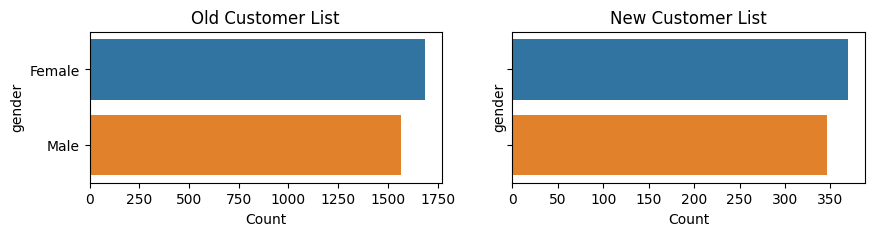

In [ ]:
#plot Gender Distribution in Old and new customer list

fig, axe = plt.subplots(1, 2, figsize = (10, 2), sharey = True, dpi = 100)

print("Gender Distribution")
sns.barplot(y = "gender", x = "customer_id", data = demograph_add[["customer_id", "gender"]].groupby("gender", as_index = False).count(), ax = axe[0])
axe[0].set_title("Old Customer List")
axe[0].set_xlabel("Count")

sns.barplot(y = "gender", x = "country", data = new_customer_df[["country", "gender"]].groupby("gender", as_index = False).count(), ax = axe[1])
axe[1].set_title("New Customer List")
axe[1].set_xlabel("Count")

plt.show()

> Job Category Distribution

In [ ]:
# create sub - dataframes
old = demograph_add[['customer_id', 'job_industry_category']].groupby("job_industry_category", as_index = False).count()
old['percentage'] =  100 * old.customer_id / old.customer_id.sum()
old['explode'] = [0.1 for i in range(len(old.customer_id))]

new = new_customer_df[["country", "job_industry_category"]].groupby("job_industry_category", as_index = False).count()
new['percentage'] = 100* new.country / new.country.sum()
new['explode'] = [0.1 for i in range(len(old.customer_id))]

In [ ]:
# Pie Plot
old_sizes, new_sizes = old['percentage'], new['percentage']
old_explode, new_explode = old['explode'], new['explode']
old_labels, new_labels = old['job_industry_category'], new['job_industry_category']

fig, axe = plt.subplots(1, 2, figsize = (6,6), sharey = True, dpi = 100)

print("Job Industry Distribution")
axe[0].pie(x = old_sizes, explode = old_explode, shadow = True, autopct='%1.1f%%')
axe[0].set_title("Old Customer List")


axe[1].pie(x = new_sizes, explode = new_explode, shadow = True, autopct='%1.1f%%')
axe[1].set_title("New Customer List")

plt.legend(labels = old_labels, bbox_to_anchor = (1.05, 1), loc = 'upper left')
plt.show()

> Age vs Wealth Segment

In [ ]:
#add age_category columns
demograph_add['age_category'] = [round(age/10, 0)*10 for age in demograph_add.customer_age]
new_customer_df['age_category'] = [round(age/10, 0) *10 for age in new_customer_df.customer_age]

In [ ]:
#Create pivot tables
old_age_pivot = pd.pivot_table(demograph_add, index = 'age_category', values = 'customer_id', columns = ['wealth_segment'], aggfunc = np.count_nonzero)
new_age_pivot = pd.pivot_table(new_customer_df, index = 'age_category', values = 'country', columns = ['wealth_segment'], aggfunc = np.count_nonzero)

In [ ]:
old_age_pivot.columns

In [ ]:
fig, axe = plt.subplots(1, 3, figsize = (15, 5), sharey = True, dpi = 100)

print("Age Vs Wealth_Segment")
sns.barplot(x = old_age_pivot.index, y = old_age_pivot["Affluent Customer"], ax = axe[0])
sns.barplot(x = new_age_pivot.index, y = -1 * new_age_pivot["Affluent Customer"], ax = axe[0])
sns.lineplot(x = [0, 5], y = [0, 0], color = 'black', ax = axe[0], linewidth = 0.5)
axe[0].set_title("Affluent Customer")
axe[0].set_ylabel("Count")

sns.barplot(x = old_age_pivot.index, y = old_age_pivot['High Net Worth'], ax = axe[1])
sns.barplot(x = new_age_pivot.index, y = -1 * new_age_pivot['High Net Worth'], ax = axe[1])
sns.lineplot(x = [0, 5], y = [0, 0], color = 'black', ax = axe[1], linewidth = 0.5)
axe[1].set_title("High Net Worth")
axe[1].set_ylabel("Count")

sns.barplot(x = old_age_pivot.index, y = old_age_pivot['Mass Customer'], ax = axe[2])
sns.barplot(x = new_age_pivot.index, y = -1 * new_age_pivot['Mass Customer'], ax = axe[2])
sns.lineplot(x = [0, 5], y = [0, 0], color = 'black', ax = axe[2], linewidth = 0.5)
axe[2].set_title("Mass Customer")
axe[2].set_ylabel("Count")

plt.text(x = 3, y = 500, s = 'upper - old customer list')
plt.text(x = 3, y = 450, s = 'lower - new customer list')

> Own car vs Purchase based on State

In [ ]:
# create respective pivot tables
old_state_purchase = pd.pivot_table(demograph_add, index = 'owns_car', values = 'past_3_years_bike_related_purchases', columns = 'state', aggfunc= np.sum)
new_state_purchase = pd.pivot_table(new_customer_df, index = 'owns_car', values = 'past_3_years_bike_related_purchases', columns = 'state', aggfunc= np.sum)

In [ ]:
old_state_purchase.head()

In [ ]:
fig, axe = plt.subplots(1, 3, figsize = (10, 3), sharey = True, dpi = 100)

print("Purchase Vs State on owning car")
sns.barplot(x = old_state_purchase.index, y = old_state_purchase['NSW'], ax = axe[0])
sns.barplot(x = new_state_purchase.index, y = -1 * new_state_purchase['NSW'], ax = axe[0])
sns.lineplot(x = [-.5, 1.5], y = [0, 0], color = 'black', linewidth = .5, ax = axe[0])
axe[0].set_title("New South Wales")
axe[0].set_ylabel("Count")

sns.barplot(x = old_state_purchase.index, y = old_state_purchase['QLD'], ax = axe[1])
sns.barplot(x = new_state_purchase.index, y = -1 * new_state_purchase['QLD'], ax = axe[1])
sns.lineplot(x = [-.5, 1.5], y = [0, 0], color = 'black', linewidth = .5, ax = axe[1])
axe[1].set_title("Queensland")
axe[1].set_ylabel("Count")

sns.barplot(x = old_state_purchase.index, y = old_state_purchase['VIC'], ax = axe[2])
sns.barplot(x = new_state_purchase.index, y = -1 * new_state_purchase['VIC'], ax = axe[2])
sns.lineplot(x = [-.5, 1.5], y = [0, 0], color = 'black', linewidth = .5, ax = axe[2])
axe[2].set_title("Victoria")
axe[2].set_ylabel("Count")

plt.text(x = -.3, y = 40000, s = 'upper - old customer list')
plt.text(x = -.3, y = 35000, s = 'lower - new customer list')

# Dashboard

> Average Profit from each wealth segment (by month and by total)

In [ ]:
segmented_transact = transact_df.merge(rfm_pivot[['customer_id', 'customer_title']], on = 'customer_id')
segmented_transact = segmented_transact.merge(demograph_df[["customer_id", "wealth_segment"]], on = 'customer_id')

In [ ]:
segmented_transact.info()

In [ ]:
wealth_profit = segmented_transact[["customer_id", "transaction_date", "profit", "wealth_segment"]]
wealth_profit["transaction_month"] = wealth_profit.transaction_date.dt.month 
wealth_profit_pivot = pd.pivot_table(wealth_profit, index = 'transaction_month', values = 'profit', columns = 'wealth_segment', aggfunc= np.mean)

In [ ]:
wealth_profit_pivot.head()

In [ ]:
ax = plt.figure(figsize = (6,4), dpi = 100)

for col in wealth_profit_pivot.columns:
    ax = sns.lineplot(x = wealth_profit_pivot.index, y = wealth_profit_pivot[col])

ax.set_ylabel("Profit")
ax.set_xlabel("Month")
ax.set_title("Average Profit per Month from Each Wealth Segment")
plt.legend(labels = list(wealth_profit_pivot.columns.values), loc = 'best')



In [ ]:
wealth_profit_average = pd.pivot_table(segmented_transact[['profit', 'wealth_segment']], index = 'wealth_segment', values = 'profit', aggfunc = np.mean)
ax = plt.figure(figsize = (6,4), dpi = 100)

sns.barplot(x = wealth_profit_average.profit, y = wealth_profit_average.index).set_title("Average Profit from Each Wealth Segment")

In [ ]:
title_demo_pivot = pd.pivot_table(segmented_demograph, index = 'customer_title', values = 'customer_id', aggfunc= np.count_nonzero)
title_demo_pivot['percent'] = round(100 * title_demo_pivot.customer_id / title_demo_pivot.customer_id.sum(), 2)
title_demo_pivot.head()

> Customer Type Distribution

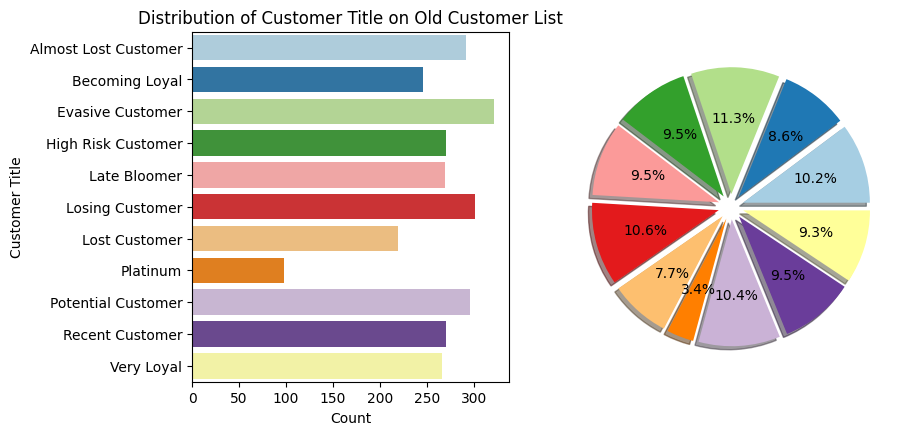

In [ ]:
fig, axe = plt.subplots(1, 2, figsize = (9, 4), dpi = 100)

sns.barplot(x = title_demo_pivot.customer_id, y =  title_demo_pivot.index, ax = axe[0], palette= sns.color_palette('Paired'))
axe[1] = plt.pie(title_demo_pivot.percent, explode = [0.1 for i in range(len(title_demo_pivot.percent))], colors = sns.color_palette('Paired'), autopct= '%1.1f%%', shadow = True)
axe[0].set_title("Distribution of Customer Title on Old Customer List")
axe[0].set_xlabel('Count')
axe[0].set_ylabel('Customer Title')
plt.subplots_adjust (top = 1)
plt.show()

> Average Profit from each customer type

In [ ]:
segmented_transact.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15714 entries, 0 to 15713
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype          
---  ------            --------------  -----          
 0   transaction_id    15714 non-null  int64          
 1   product_id        15714 non-null  int64          
 2   customer_id       15714 non-null  int64          
 3   transaction_date  15714 non-null  datetime64[ns] 
 4   online_order      15714 non-null  float64        
 5   order_status      15714 non-null  object         
 6   brand             15714 non-null  object         
 7   product_line      15714 non-null  object         
 8   product_class     15714 non-null  object         
 9   product_size      15714 non-null  object         
 10  list_price        15714 non-null  float64        
 11  standard_cost     15714 non-null  float64        
 12  profit            15714 non-null  float64        
 13  recency           15714 non-null  timedelta64[ns]
 14  custom

In [ ]:
profit_segment = segmented_transact[["customer_id", "profit", "customer_title"]]
profit_segment_pivot = pd.pivot_table(profit_segment, index = 'customer_title', values = 'profit', aggfunc = np.mean)
profit_segment_pivot['percent'] = round(100* profit_segment_pivot.profit/ profit_segment_pivot.profit.sum(), 2)

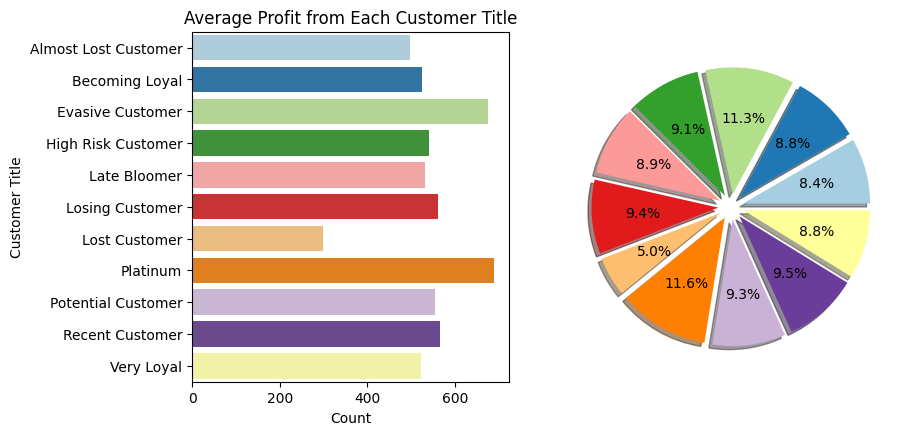

In [ ]:
fig, axe = plt.subplots(1, 2, figsize = (9, 4), dpi = 100)

sns.barplot(x = profit_segment_pivot.profit, y =  profit_segment_pivot.index, ax = axe[0], palette= sns.color_palette('Paired'))
axe[1] = plt.pie(profit_segment_pivot.percent, explode = [0.1 for i in range(len(title_demo_pivot.percent))], colors = sns.color_palette('Paired'), autopct= '%1.1f%%', shadow = True)
axe[0].set_title("Average Profit from Each Customer Title")
axe[0].set_xlabel('Count')
axe[0].set_ylabel('Customer Title')
plt.subplots_adjust (top = 1)
plt.show()

> Brand vs Customer Type

In [ ]:
segmented_transact.brand.unique()

array(['Solex', 'Giant Bicycles', 'Trek Bicycles', 'WeareA2B',
       'OHM Cycles', 'Norco Bicycles'], dtype=object)

In [ ]:
segmented_transact.order_status.unique()

array(['Approved'], dtype=object)

Text(0.5, 0, 'Percentage')

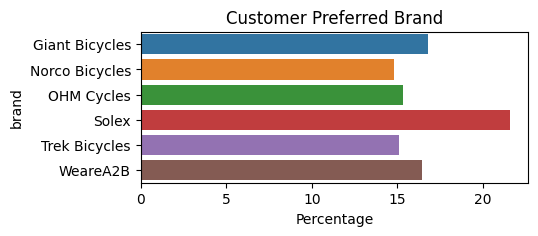

In [ ]:
brand_count = segmented_transact[["brand", "transaction_id"]].groupby("brand", as_index = False).count()
brand_count['transaction_id'] =  100 * brand_count.transaction_id / brand_count.transaction_id.sum()
ax = plt.figure(figsize = (5, 2), dpi = 100)
ax = sns.barplot(y = 'brand', x = 'transaction_id', data = brand_count)
ax.set_title("Customer Preferred Brand")
ax.set_xlabel("Percentage")

In [ ]:
brand_customer = pd.pivot_table(segmented_transact, index = 'customer_title', values = 'customer_id', columns = 'brand', aggfunc = np.count_nonzero)
for col in brand_customer.columns:
    brand_customer[col] = round(100*brand_customer[col] / brand_customer[col].sum())
brand_customer.head()

brand,Giant Bicycles,Norco Bicycles,OHM Cycles,Solex,Trek Bicycles,WeareA2B
customer_title,,,,,,
Almost Lost Customer,11.0,9.0,10.0,11.0,10.0,9.0
Becoming Loyal,7.0,9.0,9.0,8.0,7.0,8.0
Evasive Customer,8.0,6.0,7.0,8.0,8.0,9.0
High Risk Customer,8.0,7.0,8.0,8.0,8.0,8.0
Late Bloomer,6.0,8.0,7.0,8.0,7.0,7.0


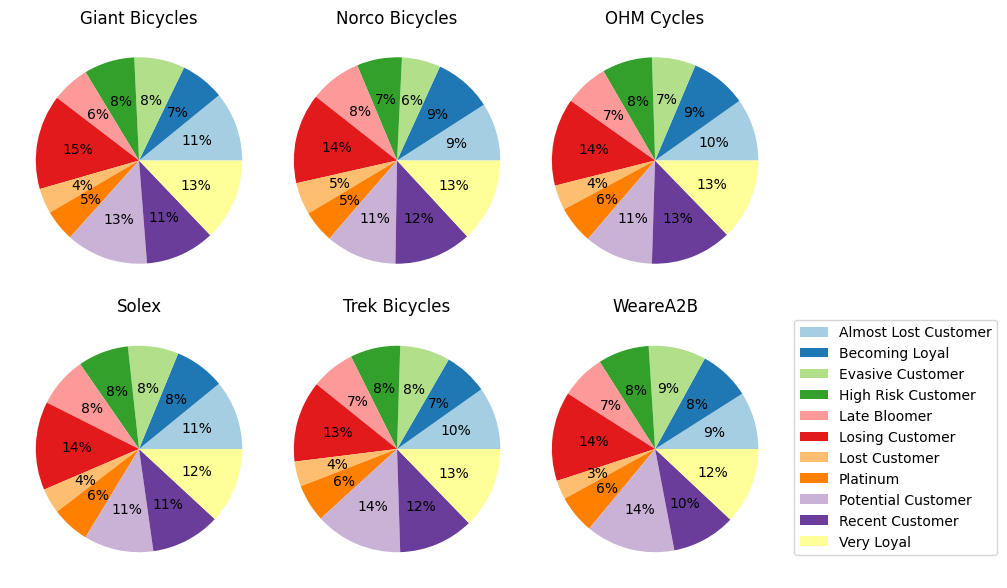

In [ ]:
fig, axe = plt.subplots(2, 3, figsize = (10, 6), dpi = 100, gridspec_kw= {"wspace": 0, 'hspace': 0})
explode = [0.1 for i in range(11)]
labels = brand_customer.index
for i, col in enumerate(brand_customer.columns):
    plot_site = i
    if plot_site < 3:
        axe[0][plot_site].pie(x = brand_customer[col], colors = sns.color_palette("Paired"), autopct = "%1.0f%%")
        axe[0][plot_site].set_title(col)
    else:
        plot_site -= 3
        axe[1][plot_site].pie(x = brand_customer[col], colors = sns.color_palette("Paired"), autopct = "%1.0f%%")
        axe[1][plot_site].set_title(col)
plt.legend(labels = labels, bbox_to_anchor=(1.04,1), borderaxespad=0)
plt.tight_layout()
plt.subplots_adjust(top=1)


> Product Class vs Customer Type

In [ ]:
class_customer = pd.pivot_table(segmented_transact, index = 'customer_title', values = 'customer_id', columns = 'product_class', aggfunc = np.count_nonzero)
for col in class_customer.columns:
    class_customer[col] = round(100*class_customer[col] / class_customer[col].sum())
class_customer.head()

product_class,high,low,medium
customer_title,,,
Almost Lost Customer,11.0,10.0,10.0
Becoming Loyal,8.0,8.0,8.0
Evasive Customer,6.0,7.0,8.0
High Risk Customer,8.0,8.0,8.0
Late Bloomer,7.0,7.0,7.0


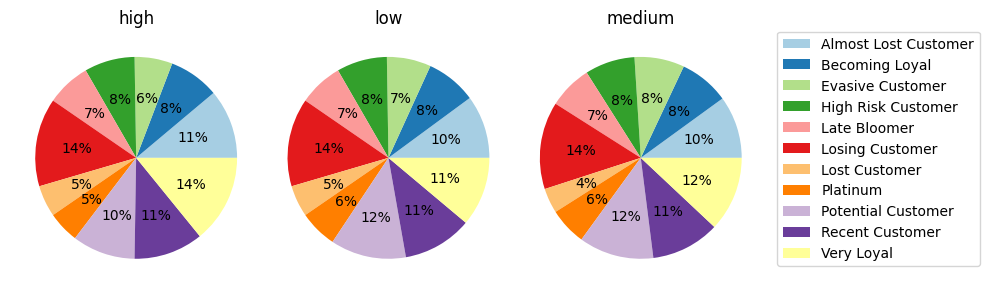

In [ ]:
fig, axe = plt.subplots(1, 3, figsize = (10, 6), dpi = 100, gridspec_kw= {"wspace": 0, 'hspace': 0})
explode = [0.1 for i in range(11)]
labels = class_customer.index

for i, col in enumerate(class_customer.columns):
    plot_site = i
    axe[plot_site].pie(x = class_customer[col], colors = sns.color_palette("Paired"), autopct = "%1.0f%%")
    axe[plot_site].set_title(col)
plt.legend(labels = labels, bbox_to_anchor=(1.04,1), borderaxespad=0)

plt.tight_layout()
plt.subplots_adjust(top=1)

# Customer type in New Customer List

In [ ]:
new_customer_df.head()

,first_name,last_name,gender,past_3_years_bike_related_purchases,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure,address,postcode,state,country,property_valuation,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Rank,Value,customer_age,age_category
0,Chickie,Brister,Male,86,General Manager,Manufacturing,Mass Customer,N,Yes,14,45 Shopko Center,4500,QLD,Australia,6,0.77,0.9625,1.203125,1.022656,1,1,1.718750,64.0,60.0
1,Morly,Genery,Male,69,Structural Engineer,Property,Mass Customer,N,No,16,14 Mccormick Park,2113,NSW,Australia,11,0.72,0.7200,0.900000,0.765000,1,1,1.718750,51.0,50.0
2,Ardelis,Forrester,Female,10,Senior Cost Accountant,Financial Services,Affluent Customer,N,No,10,5 Colorado Crossing,3505,VIC,Australia,5,0.59,0.5900,0.590000,0.590000,1,1,1.718750,47.0,50.0
3,Lucine,Stutt,Female,64,Account Representative III,Manufacturing,Affluent Customer,N,Yes,5,207 Annamark Plaza,4814,QLD,Australia,1,0.45,0.5625,0.562500,0.562500,4,4,1.703125,42.0,40.0
4,Melinda,Hadlee,Female,34,Financial Analyst,Financial Services,Affluent Customer,N,No,19,115 Montana Place,2093,NSW,Australia,9,0.90,0.9000,1.125000,1.125000,4,4,1.703125,56.0,60.0


In [ ]:
segmented_demograph.head()

,customer_id,customer_title,gender,past_3_years_bike_related_purchases,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure,customer_age,address,postcode,state,country,property_valuation
0,1,Very Loyal,Female,93,Health,Mass Customer,N,Yes,11.0,68.0,060 Morning Avenue,2016,NSW,Australia,10
1,2,Evasive Customer,Male,81,Financial Services,Mass Customer,N,Yes,16.0,41.0,6 Meadow Vale Court,2153,NSW,Australia,10
2,4,Lost Customer,Male,33,IT,Mass Customer,N,No,7.0,60.0,0 Holy Cross Court,4211,QLD,Australia,9
3,6,High Risk Customer,Male,35,Retail,High Net Worth,N,Yes,13.0,55.0,9 Oakridge Court,3216,VIC,Australia,9
4,7,Lost Customer,Female,6,Financial Services,Affluent Customer,N,Yes,11.0,45.0,4 Delaware Trail,2210,NSW,Australia,9


In [ ]:
demograph_name = pd.read_excel("/content/KPMG_VI_New_raw_data_update_final.xlsx", sheet_name= "CustomerDemographic", skiprows= [0])[["customer_id", "first_name", "last_name"]]
demograph_name['last_name'] = demograph_name.last_name.fillna(" ")
demograph_name["name"] = demograph_name.first_name + " "+ demograph_name.last_name


In [ ]:
demograph_named = segmented_demograph.merge(demograph_name[['customer_id', 'name']], on = 'customer_id')

In [ ]:
demograph_named.shape[0] == segmented_demograph.shape[0]

True

In [ ]:
new_customer_df['last_name'] = new_customer_df.last_name.fillna(" ")
new_customer_df['name'] = new_customer_df.first_name + " " + new_customer_df.last_name 

In [ ]:
new_customer_segmented = new_customer_df.merge(demograph_named[['name', 'customer_title']], on = 'name')

In [ ]:
new_customer_segmented.head()

,first_name,last_name,gender,past_3_years_bike_related_purchases,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure,address,postcode,state,country,property_valuation,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Rank,Value,customer_age,age_category,name,customer_title


In [ ]:
[name for name in new_customer_df.name if name in new_customer_df.name and name in demograph_named.name]

[]

In [ ]:
old_name = list(demograph_named.name.unique())
new_name = list(new_customer_df.name.unique())

In [ ]:
print(old_name, len(old_name))
print(new_name, len(new_name))

['Laraine Medendorp', 'Eli Bockman', 'Talbot  ', 'Curr Duckhouse', 'Fina Merali', 'Mala Lind', 'Uriah Bisatt', 'Sawyere Flattman', 'Gabriele Norcross', 'Rayshell Kitteman', 'Erroll Radage', 'Sorcha Keyson', 'Basile Firth', 'Mile Cammocke', 'Kim Skpsey', 'Geoff Assaf', 'Trixi Ginnelly', 'Garvin Klees', 'Fee Zellmer', 'Mona Sancraft', 'Darrick Helleckas', 'Star Praton', 'Marion Vanichkin', 'Margaretha Strettle', 'Laurie Dwerryhouse', 'Cordi Merman', 'Hunfredo Smalley', 'Tomasine Jerche', 'Basilius Coupe', 'Chiquita Durnall', 'Indira Belt', 'Neron Verick', 'Trace Woodhead', 'Matthew Jeaycock', 'Whitby Schapero', 'Fidelio Dilke', 'Curran Bentson', 'Agnella Gocke', 'Loralyn Wonfor', 'Linc Jillions', 'Reese Ensor', 'Dalenna Pinnock', 'Nadiya Champerlen', 'Kacey Rowbottom', 'Sorcha Roggers', 'Ebony Zini', 'Gerek Yve', 'Yale Tanser', 'Anselm Gawne', 'Vernon  ', 'Foster Vannoort', 'Hoyt Glavias', 'Sammy Cheese', 'Dollie Sealy', 'Rea Hasser', 'Shermie Andrin', 'Arch Van der Kruis', 'Tybi Sillima

In [ ]:
old_name = [name.strip() for name in old_name]
new_name = [name.strip() for name in new_name]

In [ ]:
[name for name in old_name if name in old_name and name in new_name]

[]

In [ ]:
test_demograph = pd.read_excel("/content/KPMG_VI_New_raw_data_update_final.xlsx", sheet_name= "CustomerDemographic", skiprows= [0])[["first_name", "last_name"]]
test_new_cus = pd.read_excel("/content/KPMG_VI_New_raw_data_update_final.xlsx", sheet_name= "NewCustomerList", skiprows= [0])[["first_name", "last_name"]]

In [ ]:
test_demograph["last_name"] = test_demograph.last_name.fillna("")
test_new_cus["last_name"] = test_new_cus.last_name.fillna("")
test_demograph['name'] = test_demograph.first_name + ' ' + test_demograph.last_name
test_new_cus['name'] = test_new_cus.first_name + ' ' + test_new_cus.last_name

In [ ]:
[name for name in test_demograph.name if (name in test_demograph.name) and (name in test_new_cus.name)]

[]

In [ ]:
print(len(test_demograph.name))
print(len(test_new_cus.name))

4000
1000


#Relation to Customer Type by each feature in Segmented Demograph dataframe

In [ ]:
segmented_demograph.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2847 entries, 0 to 2846
Data columns (total 15 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   customer_id                          2847 non-null   int64  
 1   customer_title                       2847 non-null   object 
 2   gender                               2847 non-null   object 
 3   past_3_years_bike_related_purchases  2847 non-null   int64  
 4   job_industry_category                2847 non-null   object 
 5   wealth_segment                       2847 non-null   object 
 6   deceased_indicator                   2847 non-null   object 
 7   owns_car                             2847 non-null   object 
 8   tenure                               2847 non-null   float64
 9   customer_age                         2847 non-null   float64
 10  address                              2847 non-null   object 
 11  postcode                      

> title vs gender

<Figure size 1000x300 with 0 Axes>

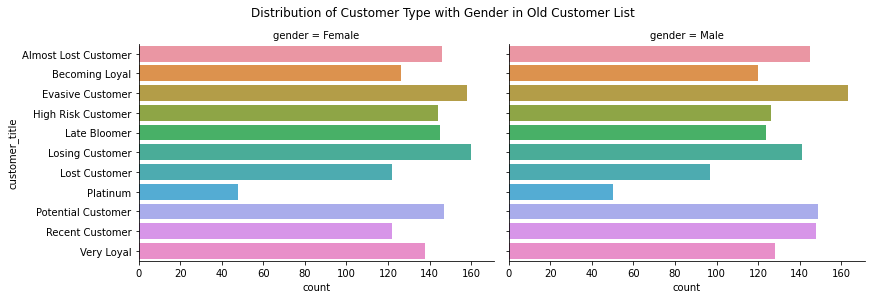

In [ ]:
temp = segmented_demograph[['customer_id', 'customer_title', 'gender']]
gender_customer_type = pd.DataFrame(columns = ["gender", 'customer_title', 'count'])
for gen in temp.gender.unique():
    temp_df1 = pd.DataFrame()
    temp_df1['gender'] = [gen for i in range(len(temp.customer_title.unique()))]
    temp_df1['customer_title'] = temp[temp.gender == gen].groupby('customer_title', as_index = False).count().sort_values("customer_title")['customer_title']
    temp_df1['count'] = temp[temp.gender == gen].groupby('customer_title', as_index = False).count().sort_values('customer_title')['customer_id']
    gender_customer_type = pd.concat([gender_customer_type, temp_df1])

# plot distribution of customer type with gender in old customer list
ax = plt.figure(figsize = (10, 3), dpi = 100)

ax = sns.catplot(y = 'customer_title', x = 'count', col = 'gender', kind = 'bar', data = gender_customer_type, height = 4 , aspect = 1.5)
ax.fig.subplots_adjust(top = 0.85)
ax.fig.suptitle("Distribution of Customer Type with Gender in Old Customer List")

plt.show()

In [ ]:
segmented_demograph.past_3_years_bike_related_purchases.unique()

array([93, 81, 33, 35,  6, 97, 99, 58, 38, 85, 91, 76, 72, 74, 55, 12, 37,
        5, 62, 18,  3, 17, 40, 46, 64, 24, 63, 51, 68, 57, 22,  2, 48, 44,
       26, 47, 73, 21, 67, 78, 30, 28, 20, 79, 11, 75, 41, 69, 98, 16, 19,
       80, 83, 49, 25, 54, 23, 88, 10, 77, 82, 87, 27, 94, 53, 32, 34,  1,
        9, 36,  4, 90, 61, 95, 39,  7, 42, 13, 45, 71, 56, 50, 14, 89, 84,
       96, 59, 65, 70, 31, 60, 66,  0, 43, 86, 92,  8, 29, 15, 52])

In [ ]:
segmented_demograph["past3yearspurchases_category"] = round(segmented_demograph.past_3_years_bike_related_purchases / 10, 0) *10

In [ ]:
segmented_demograph.past3yearspurchases_category.unique()

array([ 90.,  80.,  30.,  40.,  10., 100.,  60.,  70.,   0.,  20.,  50.])

In [ ]:
purchase_title = segmented_demograph.groupby("customer_title")['past3yearspurchases_category'].value_counts().unstack()
purchase_title_percent = 100 * purchase_title.divide(purchase_title.sum(axis = 1), axis = 0)
purchase_title_percent.head()

past3yearspurchases_category,0.0,10.0,20.0,30.0,40.0,50.0,60.0,70.0,80.0,90.0,100.0
customer_title,,,,,,,,,,,
Almost Lost Customer,5.841924,6.872852,14.432990,8.247423,11.683849,6.872852,10.309278,8.247423,10.652921,9.965636,6.872852
Becoming Loyal,4.065041,10.162602,16.260163,6.097561,11.788618,9.756098,11.788618,10.569106,10.162602,4.471545,4.878049
Evasive Customer,5.607477,8.722741,11.214953,8.411215,12.772586,9.345794,9.034268,9.034268,12.149533,8.411215,5.295950
High Risk Customer,4.444444,11.851852,10.000000,13.333333,8.888889,6.666667,11.481481,10.370370,8.148148,10.000000,4.814815
Late Bloomer,5.576208,5.576208,11.524164,8.178439,11.895911,10.408922,10.780669,9.665428,11.152416,8.921933,6.319703


Text(0.5, 1.0, 'Purchase Count Category Vs Customer Title')

<Figure size 800x500 with 0 Axes>

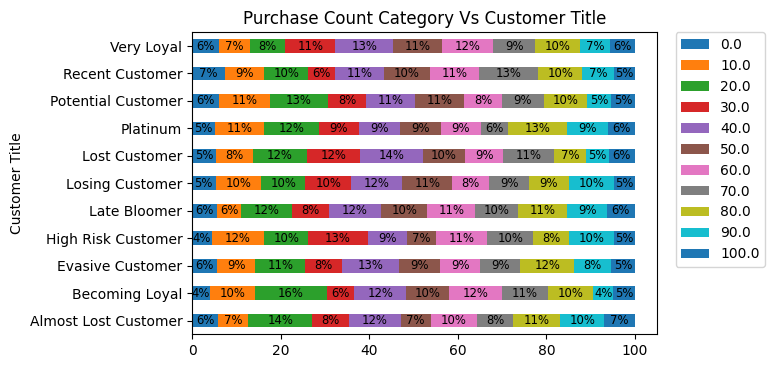

In [ ]:
ax = plt.figure(figsize= (8, 5), dpi = 100)
plt.rcParams['figure.dpi'] = 100
ax = purchase_title_percent.plot.barh(stacked = True)

for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy()
    ax.text(x+width/2, y+height/2, '{:.0f}%'.format(width),
            horizontalalignment = 'center', verticalalignment = 'center', fontsize = 'small')
plt.legend(labels = purchase_title.columns,  bbox_to_anchor=(1.04,1), borderaxespad=0)
plt.ylabel("Customer Title")
plt.title("Purchase Count Category Vs Customer Title")

In [ ]:
industry_title = segmented_demograph.groupby("customer_title")["job_industry_category"].value_counts().unstack()
industry_title_percent = 100* industry_title.divide(industry_title.sum(axis = 1), axis = 0)
industry_title_percent.head()

job_industry_category,Argiculture,Entertainment,Financial Services,Health,IT,Manufacturing,Property,Retail,Telecommunications
customer_title,,,,,,,,,
Almost Lost Customer,5.841924,4.810997,22.680412,15.807560,4.467354,26.460481,6.872852,10.996564,2.061856
Becoming Loyal,4.878049,2.845528,24.796748,21.951220,3.658537,21.138211,8.536585,10.162602,2.032520
Evasive Customer,3.115265,3.738318,24.922118,13.707165,5.295950,26.479751,9.657321,9.657321,3.426791
High Risk Customer,2.222222,4.444444,25.185185,17.037037,6.666667,25.185185,10.370370,7.407407,1.481481
Late Bloomer,2.973978,4.089219,21.189591,18.959108,1.486989,28.252788,12.267658,9.665428,1.115242


Text(0.5, 1.0, 'Job Industry Category Vs Customer Title')

<Figure size 500x300 with 0 Axes>

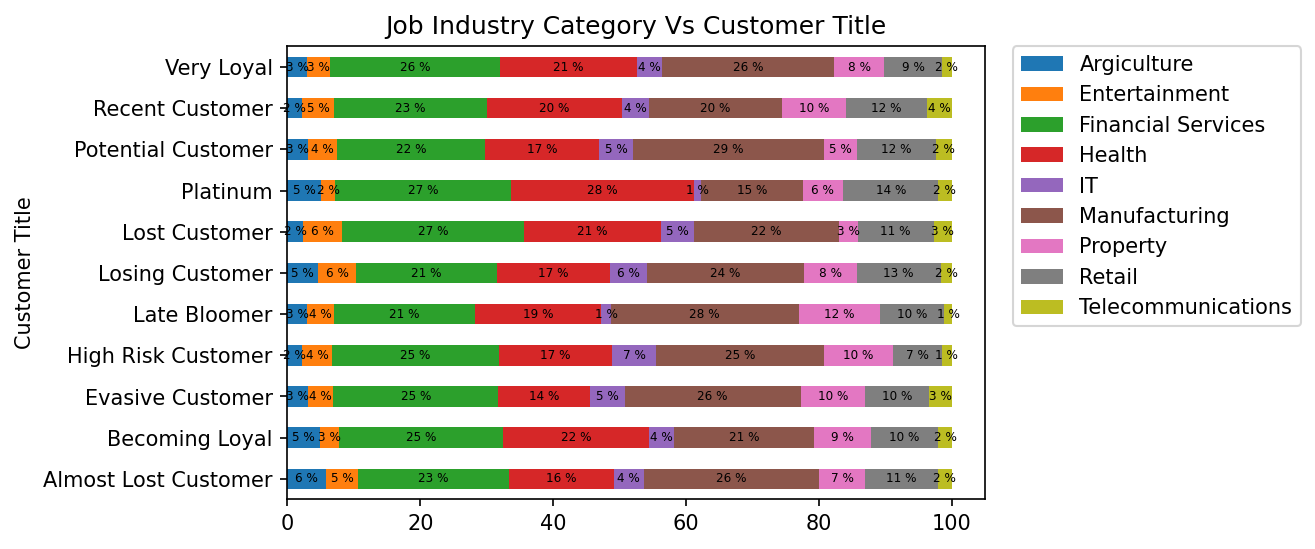

In [ ]:
ax = plt.figure(figsize= (5,3))
plt.rcParams['figure.dpi'] = 150
ax = industry_title_percent.plot.barh(stacked = True)

for p in ax.patches:
    width , height = p.get_width(), p.get_height()
    x, y = p.get_xy()
    ax.text(x+width/2, 
            y+height/2, 
            '{:.0f} %'.format(width), 
            horizontalalignment='center', 
            verticalalignment='center',
            fontsize = 'xx-small')

plt.legend(bbox_to_anchor = (1.04,1), borderaxespad = 0)
plt.ylabel("Customer Title")
plt.title("Job Industry Category Vs Customer Title")

In [ ]:
wealth_title1 = segmented_demograph.groupby("customer_title")["wealth_segment"].value_counts().unstack()
wealth_title1.head()

wealth_segment,Affluent Customer,High Net Worth,Mass Customer
customer_title,,,
Almost Lost Customer,73,64,154
Becoming Loyal,62,59,125
Evasive Customer,76,81,164
High Risk Customer,68,73,129
Late Bloomer,74,70,125


Text(0, 0.5, 'Customer Title')

<Figure size 750x450 with 0 Axes>

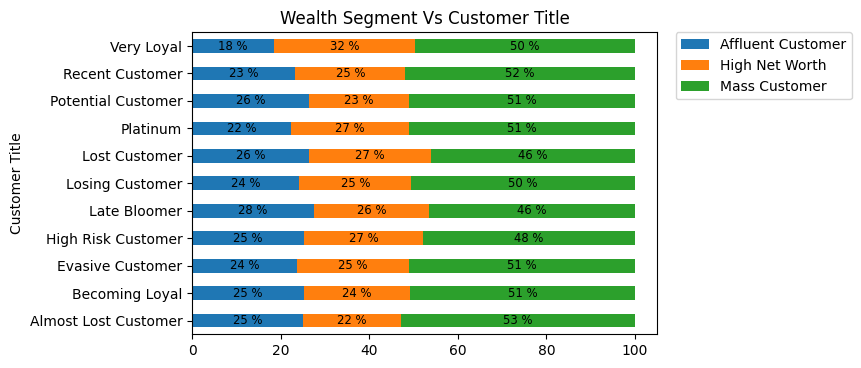

In [ ]:
ax = plt.figure(figsize = (5, 3))
plt.rcParams["figure.dpi"] = 100
percentage_dist = 100 * wealth_title1.divide(wealth_title1.sum(axis = 1), axis = 0 )
ax = percentage_dist.plot.barh(stacked = True)

for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.text(x+width/2, 
            y+height/2, 
            '{:.0f} %'.format(width), 
            horizontalalignment='center', 
            verticalalignment='center',
            fontsize = 'small')

plt.legend(bbox_to_anchor = (1.04, 1), borderaxespad = 0)
plt.title("Wealth Segment Vs Customer Title")
plt.ylabel("Customer Title")

In [ ]:
car_title = segmented_demograph.groupby("customer_title")['owns_car'].value_counts().unstack()
car_title_percent = 100* car_title.divide(car_title.sum(axis = 1), axis = 0)
car_title_percent.head()

owns_car,No,Yes
customer_title,,
Almost Lost Customer,53.608247,46.391753
Becoming Loyal,47.560976,52.439024
Evasive Customer,46.417445,53.582555
High Risk Customer,50.000000,50.000000
Late Bloomer,46.840149,53.159851


Text(0.5, 1.0, 'Owning a car Vs Title')

<Figure size 500x200 with 0 Axes>

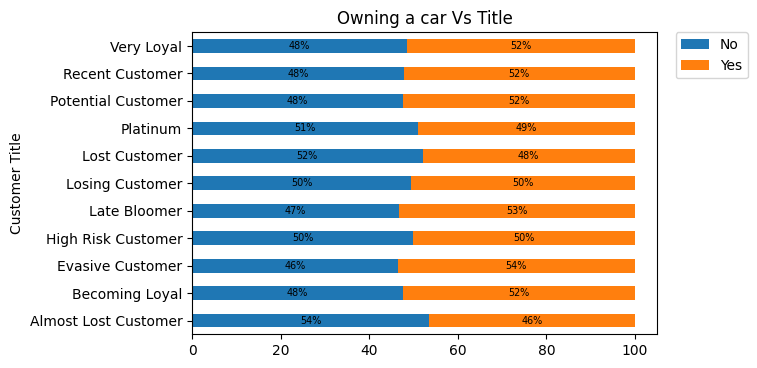

In [ ]:
ax = plt.figure(figsize = (5, 2))
plt.rcParams['figure.dpi'] = 100
ax = car_title_percent.plot.barh(stacked = True)

for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy()
    ax.text(x+width/2, y+height/2, '{:.0f}%'.format(width),
            horizontalalignment = 'center', verticalalignment = 'center',
            fontsize = 'x-small')

plt.legend(bbox_to_anchor = (1.04, 1), borderaxespad = 0)
plt.ylabel("Customer Title")
plt.title("Owning a car Vs Title")

In [ ]:
tenure_title = segmented_demograph.groupby("customer_title")["tenure"].value_counts().unstack()
tenure_title_percent = 100* tenure_title.divide(tenure_title.sum(axis = 1), axis = 0)
tenure_title_percent.head()

tenure,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,11.0,12.0,13.0,14.0,15.0,16.0,17.0,18.0,19.0,20.0,21.0,22.0
customer_title,,,,,,,,,,,,,,,,,,,,,,
Almost Lost Customer,3.436426,4.123711,3.780069,4.123711,5.498282,5.498282,5.498282,8.591065,3.780069,7.560137,4.467354,3.780069,5.841924,4.467354,3.780069,5.498282,4.467354,3.436426,4.810997,3.436426,1.718213,2.405498
Becoming Loyal,5.284553,3.252033,4.471545,4.471545,2.845528,8.130081,4.878049,3.252033,2.845528,6.910569,6.097561,3.252033,7.317073,4.471545,5.284553,5.284553,5.691057,5.691057,5.284553,2.032520,1.219512,2.032520
Evasive Customer,4.361371,3.738318,3.738318,4.361371,4.361371,1.869159,3.115265,6.230530,6.230530,3.738318,8.722741,5.607477,4.049844,7.165109,6.230530,5.919003,3.426791,6.853583,3.738318,3.426791,2.180685,0.934579
High Risk Customer,3.333333,4.444444,5.555556,5.555556,7.777778,5.925926,4.074074,4.444444,5.925926,4.444444,4.074074,6.296296,6.296296,7.407407,2.222222,5.555556,4.074074,5.555556,1.851852,1.851852,1.481481,1.851852
Late Bloomer,4.089219,4.832714,3.717472,4.832714,8.178439,4.089219,6.691450,4.089219,4.089219,3.717472,6.319703,5.204461,6.691450,4.832714,4.460967,5.204461,3.717472,6.691450,2.973978,2.230483,1.115242,2.230483


Text(0.5, 1.0, 'Tenure Vs Title')

<Figure size 500x200 with 0 Axes>

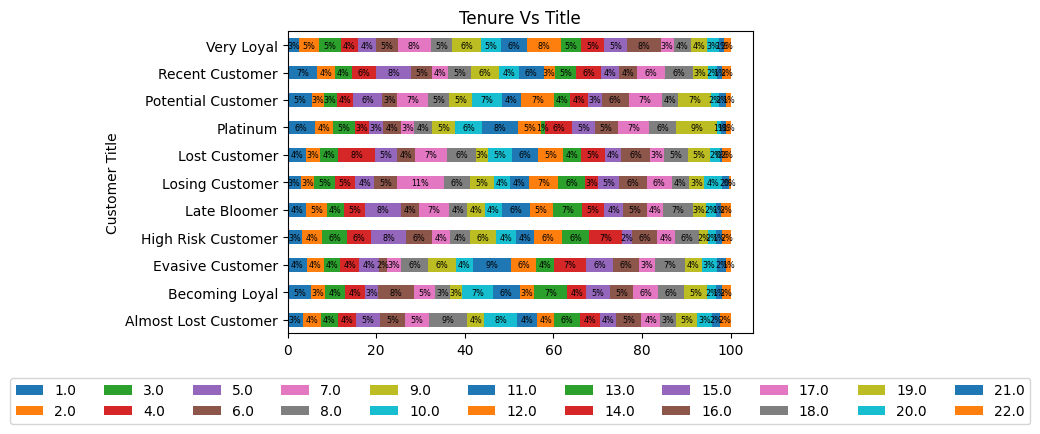

In [ ]:
ax = plt.figure(figsize = (5, 2))
plt.rcParams['figure.dpi'] = 100
ax = tenure_title_percent.plot.barh(stacked = True)

for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy()
    ax.text(x+width/2, y+height/2, '{:.0f}%'.format(width),
            horizontalalignment = 'center', verticalalignment = 'center',
            fontsize = 'xx-small')

plt.legend(loc = 'lower center',bbox_to_anchor = (0.5, -0.3), borderaxespad = 0, ncol = int(len(tenure_title_percent.columns)/2))
plt.ylabel("Customer Title")
plt.title("Tenure Vs Title")

In [ ]:
segmented_demograph['age_category'] = round(segmented_demograph.customer_age/10, 0) * 10

Text(0.5, 1.0, 'Age Category Vs Title')

<Figure size 2000x200 with 0 Axes>

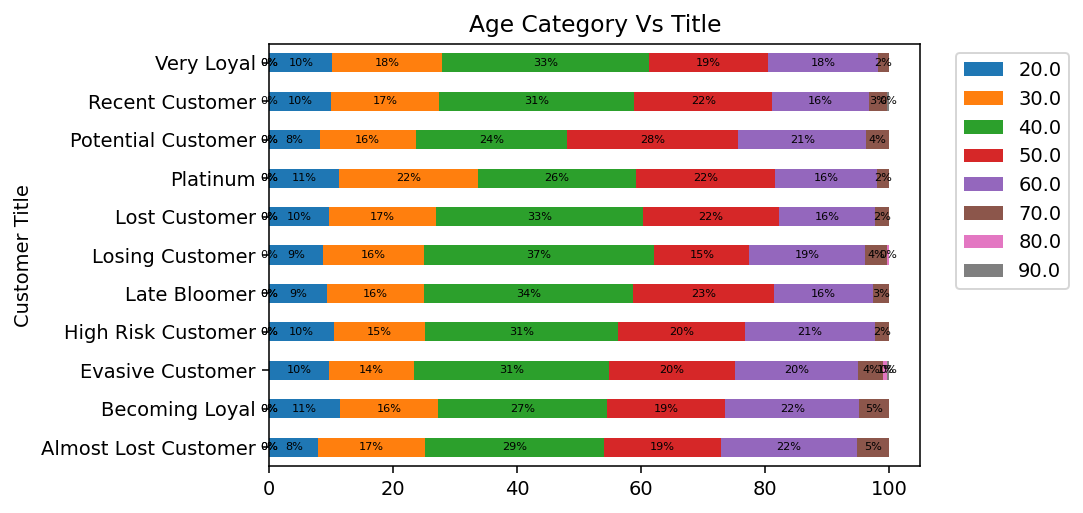

In [ ]:
age_title = segmented_demograph.groupby("customer_title")['age_category'].value_counts().unstack()
age_title_percent = 100* age_title.divide(age_title.sum(axis = 1), axis = 0)

ax = plt.figure(figsize = (20, 2))
plt.rcParams['figure.dpi'] = 140
ax = age_title_percent.plot.barh(stacked = True)

for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy()

    ax.text(x+width/2, y+height/2, "{:.0f}%".format(width),
            horizontalalignment = 'center', verticalalignment = 'center', fontsize = 'xx-small')
    
plt.legend(bbox_to_anchor = (1.04, 1))
plt.ylabel("Customer Title")
plt.title("Age Category Vs Title")

Text(0.5, 1.0, 'State Vs Title')

<Figure size 2800x280 with 0 Axes>

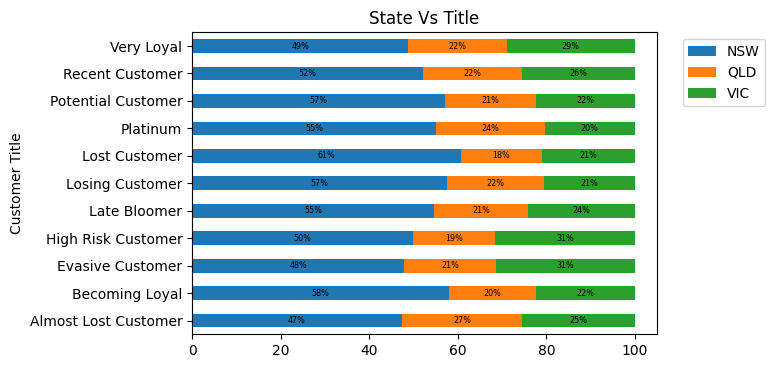

In [ ]:
state_title = segmented_demograph.groupby("customer_title")['state'].value_counts().unstack()
state_title_percent = 100* state_title.divide(state_title.sum(axis = 1), axis = 0)

ax = plt.figure(figsize = (20, 2))
plt.rcParams['figure.dpi'] = 100
ax = state_title_percent.plot.barh(stacked = True)

for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy()

    ax.text(x+width/2, y+height/2, "{:.0f}%".format(width),
            horizontalalignment = 'center', verticalalignment = 'center', fontsize = 'xx-small')
    
plt.legend(bbox_to_anchor = (1.04, 1))
plt.ylabel("Customer Title")
plt.title("State Vs Title")

Text(0.5, 1.0, 'Property valuation Vs Title')

<Figure size 2000x200 with 0 Axes>

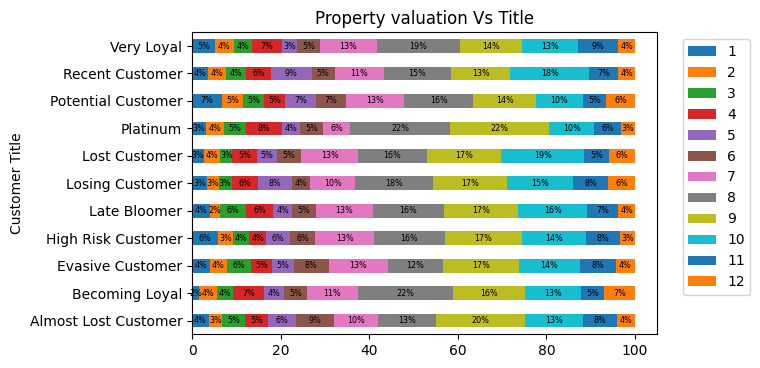

In [ ]:
property_title = segmented_demograph.groupby("customer_title")['property_valuation'].value_counts().unstack()
property_title_percent = 100*property_title.divide(property_title.sum(axis = 1), axis = 0)

ax = plt.figure(figsize = (20, 2))
plt.rcParams['figure.dpi'] = 100
ax = property_title_percent.plot.barh(stacked = True)

for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy()

    ax.text(x+width/2, y+height/2, "{:.0f}%".format(width),
            horizontalalignment = 'center', verticalalignment = 'center', fontsize = 'xx-small')
    
plt.legend(bbox_to_anchor = (1.04, 1))
plt.ylabel("Customer Title")
plt.title("Property valuation Vs Title")

In [ ]:
transact_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19273 entries, 0 to 19272
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype          
---  ------            --------------  -----          
 0   transaction_id    19273 non-null  int64          
 1   product_id        19273 non-null  int64          
 2   customer_id       19273 non-null  int64          
 3   transaction_date  19273 non-null  datetime64[ns] 
 4   online_order      19273 non-null  float64        
 5   order_status      19273 non-null  object         
 6   brand             19273 non-null  object         
 7   product_line      19273 non-null  object         
 8   product_class     19273 non-null  object         
 9   product_size      19273 non-null  object         
 10  list_price        19273 non-null  float64        
 11  standard_cost     19273 non-null  float64        
 12  profit            19273 non-null  float64        
 13  recency           19273 non-null  timedelta64[ns]
dtypes: dat

In [ ]:
new_customer_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 715 entries, 0 to 714
Data columns (total 25 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   first_name                           715 non-null    object 
 1   last_name                            715 non-null    object 
 2   gender                               715 non-null    object 
 3   past_3_years_bike_related_purchases  715 non-null    int64  
 4   job_title                            715 non-null    object 
 5   job_industry_category                715 non-null    object 
 6   wealth_segment                       715 non-null    object 
 7   deceased_indicator                   715 non-null    object 
 8   owns_car                             715 non-null    object 
 9   tenure                               715 non-null    int64  
 10  address                              715 non-null    object 
 11  postcode                        

# Features to Profits

In [ ]:
segmented_demograph.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2847 entries, 0 to 2846
Data columns (total 17 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   customer_id                          2847 non-null   int64  
 1   customer_title                       2847 non-null   object 
 2   gender                               2847 non-null   object 
 3   past_3_years_bike_related_purchases  2847 non-null   int64  
 4   job_industry_category                2847 non-null   object 
 5   wealth_segment                       2847 non-null   object 
 6   deceased_indicator                   2847 non-null   object 
 7   owns_car                             2847 non-null   object 
 8   tenure                               2847 non-null   float64
 9   customer_age                         2847 non-null   float64
 10  address                              2847 non-null   object 
 11  postcode                      

In [ ]:
profit_demo = transact_df[['customer_id', 'profit']].merge(segmented_demograph, on = 'customer_id')
profit_demo.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15695 entries, 0 to 15694
Data columns (total 18 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   customer_id                          15695 non-null  int64  
 1   profit                               15695 non-null  float64
 2   customer_title                       15695 non-null  object 
 3   gender                               15695 non-null  object 
 4   past_3_years_bike_related_purchases  15695 non-null  int64  
 5   job_industry_category                15695 non-null  object 
 6   wealth_segment                       15695 non-null  object 
 7   deceased_indicator                   15695 non-null  object 
 8   owns_car                             15695 non-null  object 
 9   tenure                               15695 non-null  float64
 10  customer_age                         15695 non-null  float64
 11  address                     

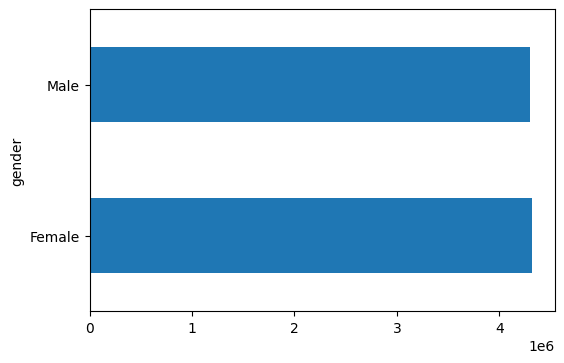

In [ ]:
profit_gender = profit_demo.groupby("gender")['profit'].sum()
profit_gender.plot.barh()

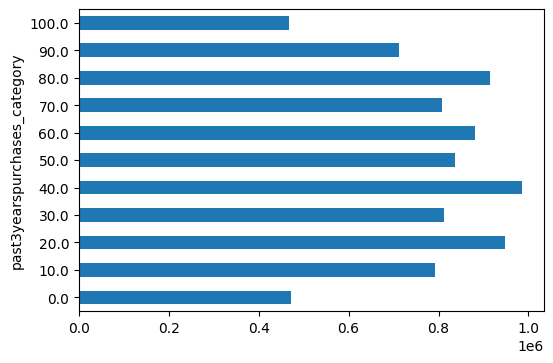

In [ ]:
profit_purchase = profit_demo.groupby("past3yearspurchases_category")['profit'].sum()
profit_purchase.plot.barh()

Text(0.5, 1.0, 'Job Industry with Category')

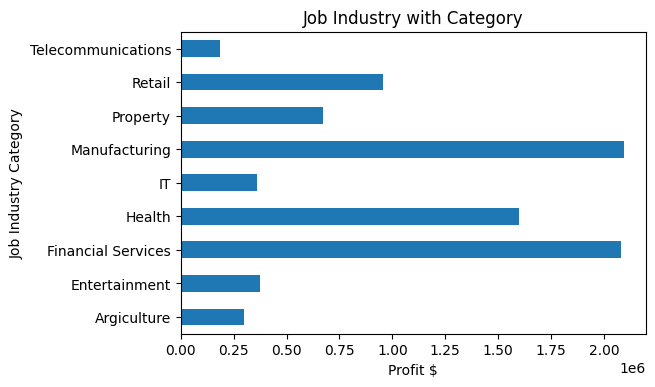

In [ ]:
profit_industry = profit_demo.groupby("job_industry_category")['profit'].sum()
profit_industry.plot.barh()
plt.ylabel("Job Industry Category")
plt.xlabel("Profit $")
plt.title("Job Industry with Category")

Text(0.5, 1.0, 'Wealth Segment Vs Profit')

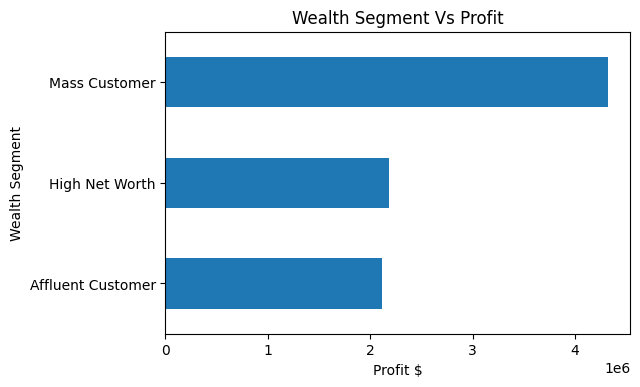

In [ ]:
profit_wealth = profit_demo.groupby("wealth_segment")['profit'].sum()
profit_wealth.plot.barh()
plt.ylabel("Wealth Segment")
plt.xlabel("Profit $")
plt.title("Wealth Segment Vs Profit")

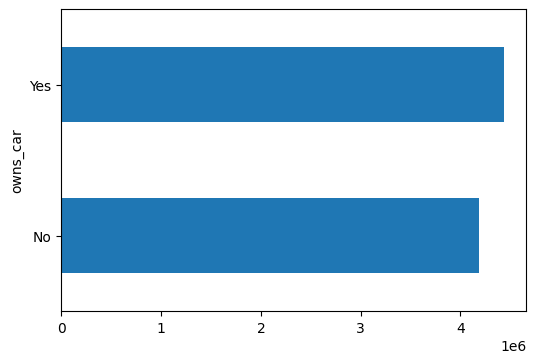

In [ ]:
profit_car = profit_demo.groupby("owns_car")['profit'].sum()
profit_car.plot.barh()

Text(0.5, 1.0, 'Age Category Vs Profit')

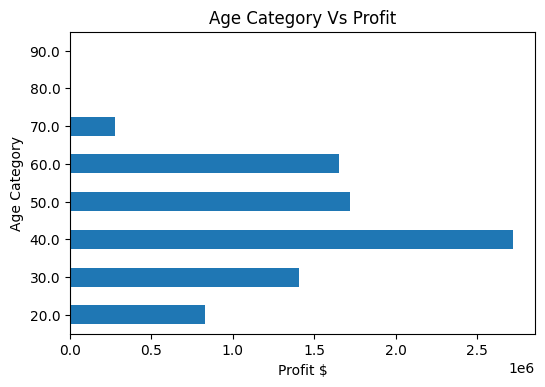

In [ ]:
profit_age = profit_demo.groupby("age_category")['profit'].sum()
profit_age.plot.barh()
plt.ylabel("Age Category")
plt.xlabel("Profit $")
plt.title("Age Category Vs Profit")

Text(0.5, 1.0, 'State Vs Profit')

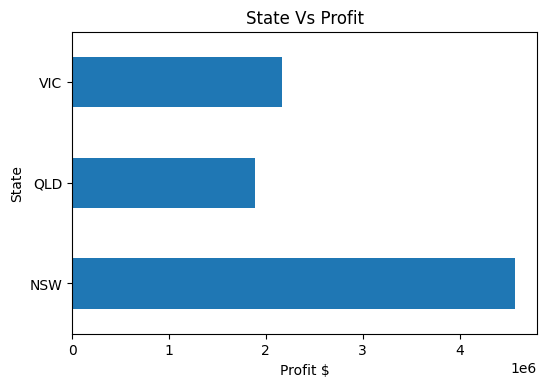

In [ ]:
profit_state = profit_demo.groupby("state")['profit'].sum()
profit_state.plot.barh()
plt.xlabel("Profit $")
plt.ylabel("State")
plt.title("State Vs Profit")

Text(0.5, 1.0, 'Property Valuation Vs Profit')

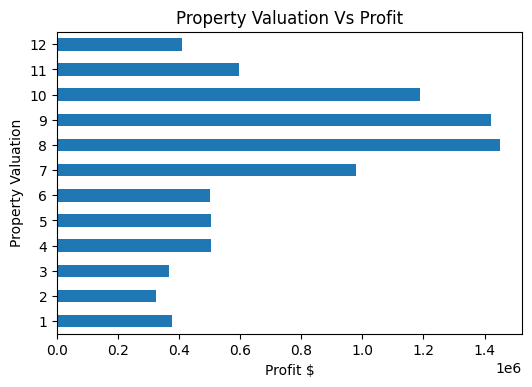

In [ ]:
profit_property = profit_demo.groupby("property_valuation")['profit'].sum()
profit_property.plot.barh()
plt.xlabel("Profit $")
plt.ylabel("Property Valuation")
plt.title("Property Valuation Vs Profit")

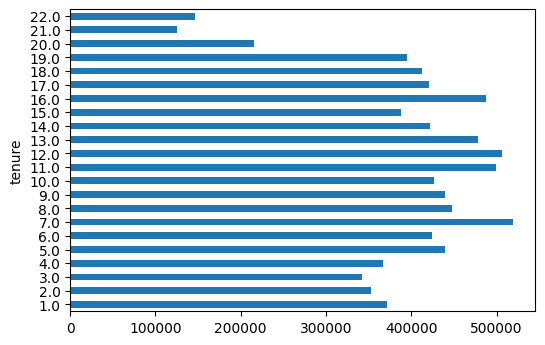

In [ ]:
profit_tenure = profit_demo.groupby("tenure")['profit'].sum()
profit_tenure.plot.barh()

In [ ]:
target = target[(target.property_valuation > 6 ) & (target.property_valuation < 11)]

In [ ]:
target.shape

(233, 25)

In [ ]:
new_customer_df.to_excel("transformed_new_customer.xlsx")